# Let's test your implementation of KNN 

In [217]:
# import your class on KNN
from MyKnn import KNN
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.io import arff
from sklearn.preprocessing import StandardScaler




In [218]:
assert KNN is not None, 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [219]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish. 

In [220]:
df2 = pd.read_csv('datasets/iris.data', header=None)

In [221]:
df2['target'] = df2[4].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 })

## Load your data into X and y

In [222]:
y = df2['target'].values
X = df2.drop([4, 'target'], axis=1).values 

In [223]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

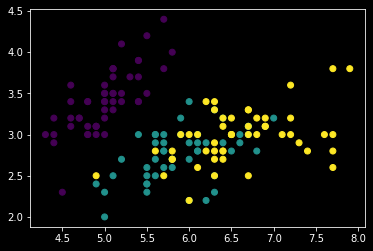

In [224]:
plt.scatter(X[:,0],X[:,1], c=y);

## Plot X showing the class

example
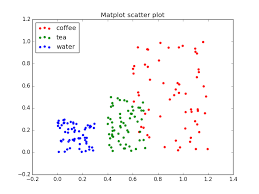

In [225]:
# plot X showing the classes hold in y

## Fit the model

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [261]:
model = KNN(k=4).fit(X_train, y_train)

In [262]:
type(model)

MyKnn.KNN

In [263]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [264]:
predictions = model.predict(X_test)
accuracy = model.evaluate(predictions, y_test)

In [266]:
f'Accuracy of model = {accuracy:.2f}%'

'Accuracy of model = 36.67%'

In [240]:
scores = {}
for k in range(1, 500, 2):
    model = KNN(k).fit(X, y)
    predictions = model.predict(X)
    score = model.evaluate(predictions, y)
    scores[k] = score



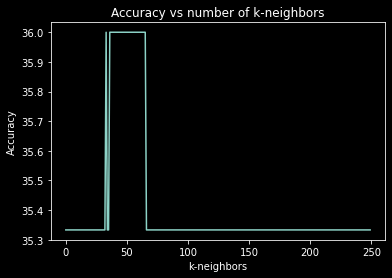

In [243]:
plt.plot(scores.values())
plt.title('Accuracy vs number of k-neighbors')
plt.ylabel('Accuracy')
plt.xlabel('k-neighbors');

## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [245]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,50,5)):
    model = KNN(k=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

interactive(children=(IntSlider(value=21, description='k', max=50, min=1, step=5), Output()), _dom_classes=('w…

# Repeat this process with Dataset 2 and Dataset 3

In [268]:
data = arff.loadarff('datasets/caesarian/caesarian.csv.arff')
df1 = pd.DataFrame(data[0])

In [269]:
# load your data into X and y numpy arrays
y = df1['Caesarian'].values
X = df1.drop('Caesarian', axis=1).values


In [270]:
for column in df1.columns:
    df1[column] = df1[column].astype('int')

In [275]:
X1 = df1.drop('Caesarian', axis=1)
y1 = df1['Caesarian']

In [276]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

In [278]:
model1 = KNN(k=2).fit(X1_train, y1_train)
predictions = model.predict(X1_test)
accuracy = model.evaluate(predictions, y1_test)

In [279]:
f'Accuracy of model = {accuracy:.2f}%'

'Accuracy of model = 12.50%'

# Compare performance vs Sklearn

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [257]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [258]:
predictions = knn.predict(X_test)

In [259]:
accuracy_score(predictions,y_test) 

0.9666666666666667